# **Week-8 Assignment**

## RAG Q&A chatbot using document retrieval and generative AI for intelligent response generation (can use any light model from hugging face or a license llm(opneai, claude, grok, gemini) if free credits available.

### Importing necessary libraries and dataset

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


In [118]:
data= pd.read_csv("C:\\Users\\lavan\\OneDrive\\Desktop\\archive (3)\\Training Dataset.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [119]:
data.shape

(614, 13)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Checking for missing values

In [122]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [123]:
data.isnull().sum().sum()

149

### Exploratory Data Analysis

<Axes: ylabel='count'>

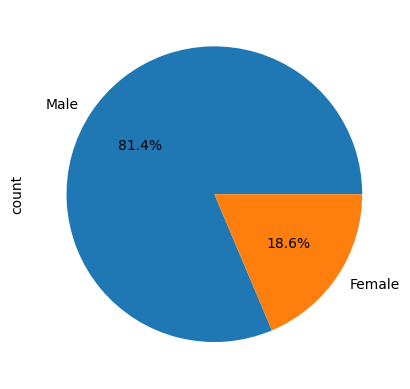

In [125]:
# Gender
data['Gender'].value_counts().plot(kind='pie',autopct="%1.1f%%")

In [126]:
# Gender and Loan Status
data.groupby('Gender')['Loan_Status'].value_counts().plot

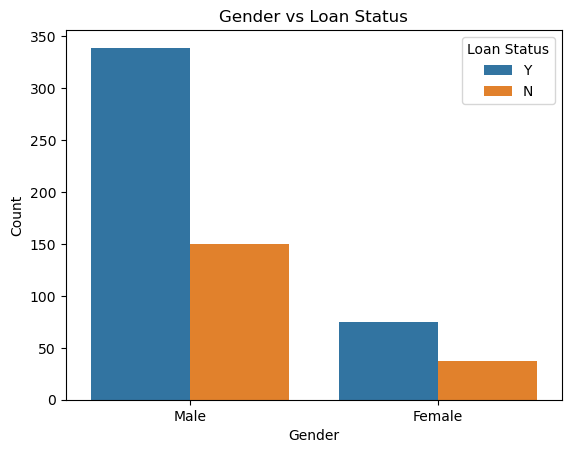

In [127]:
sns.countplot(x='Gender', hue='Loan_Status', data=data)
plt.title('Gender vs Loan Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [128]:
# Percentage of male & female in approved loans
approved_loans = data[data['Loan_Status']=='Y']
total_approved = len(approved_loans)
total_males = len(data[data['Gender']=='Male'])
total_females = len(data[data['Gender']=='Female'])
approved_males = len(approved_loans[approved_loans['Gender']=='Male'])
approved_females = len(approved_loans[approved_loans['Gender']=='Female'])

print(f'Percentage of male with approved loans: {approved_males/total_males}')
print(f'Percentage of female with approved loans: {approved_females/total_females}')
print(f'Male loans approved: {approved_males/total_approved}')
print(f'Female loans approved: {approved_females/total_approved}')

Percentage of male with approved loans: 0.6932515337423313
Percentage of female with approved loans: 0.6696428571428571
Male loans approved: 0.8033175355450237
Female loans approved: 0.17772511848341233


<Axes: ylabel='count'>

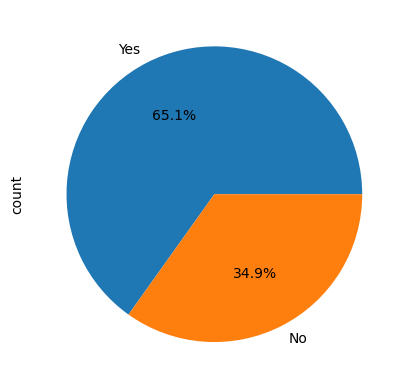

In [129]:
# Married
data['Married'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [130]:
# Married vs Loan Status
data.groupby('Married')['Loan_Status'].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: count, dtype: int64

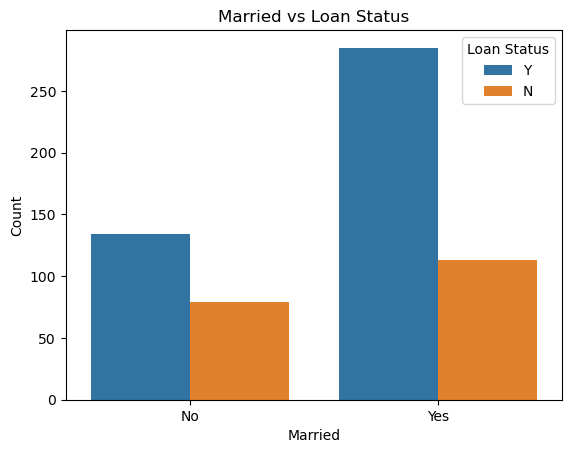

In [131]:
sns.countplot(x='Married', hue='Loan_Status', data=data)
plt.title('Married vs Loan Status')
plt.xlabel('Married')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [132]:
# Filter the dataframe for approved loans
approved_loans = data[data['Loan_Status'] == 'Y']

# Calculate the total number of approved loans
total_approved = len(approved_loans)

# Calculate the number of approved loans for married and unmarried applicants
unmarried_approved = approved_loans[approved_loans['Married'] == 'No']
married_approved = approved_loans[approved_loans['Married'] == 'Yes']

# Calculate the percentages
percent_married_approved = (len(married_approved) / total_approved) * 100
percent_unmarried_approved = (len(unmarried_approved) / total_approved) * 100

# Calculate the number of approved loans for married males and females
married_males_approved = len(married_approved[married_approved['Gender'] == 'Male'])
married_females_approved = len(married_approved[married_approved['Gender'] == 'Female'])

# Calculate the total number of approved loans for males and females
approved_males = len(approved_loans[approved_loans['Gender'] == 'Male'])
approved_females = len(approved_loans[approved_loans['Gender'] == 'Female'])

# Calculate the percentages for married males and females
percent_married_males_approved = (married_males_approved / approved_males) * 100
percent_married_females_approved = (married_females_approved / approved_females) * 100

# Print the results
print(f'Percentage of married approved loans: {percent_married_approved:.2f}%')
print(f'Percentage of unmarried approved loans: {percent_unmarried_approved:.2f}%')
print(f'Percentage of married males with approved loans: {percent_married_males_approved:.2f}%')
print(f'Percentage of married females with approved loans: {percent_married_females_approved:.2f}%')

Percentage of married approved loans: 67.54%
Percentage of unmarried approved loans: 31.75%
Percentage of married males with approved loans: 75.52%
Percentage of married females with approved loans: 30.67%


<Axes: ylabel='count'>

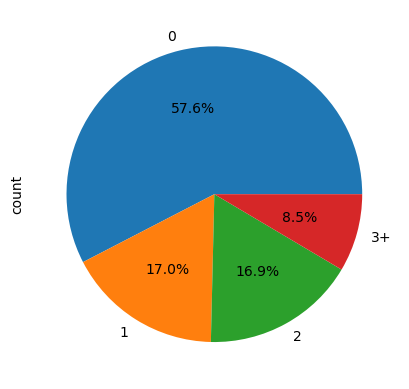

In [133]:
# Dependents
data['Dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [134]:
# Dependents vs Loan Status

# Calculate the counts of loan statuses grouped by dependents
dependents_loan_status_counts = data.groupby('Dependents')['Loan_Status'].value_counts()

# Convert the counts to a percentage
dependents_loan_status_percentage = dependents_loan_status_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Display the percentage
print(dependents_loan_status_percentage)

Dependents  Dependents  Loan_Status
0           0           Y              68.985507
                        N              31.014493
1           1           Y              64.705882
                        N              35.294118
2           2           Y              75.247525
                        N              24.752475
3+          3+          Y              64.705882
                        N              35.294118
Name: count, dtype: float64


<Axes: ylabel='count'>

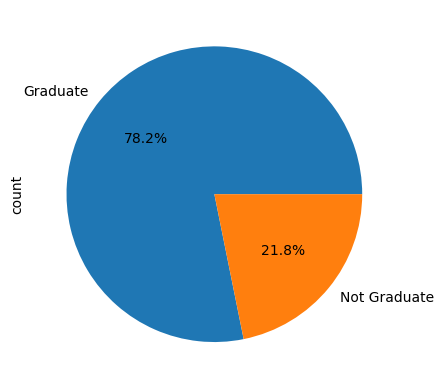

In [135]:
# Education
data['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [136]:
# Education vs Loan Status
data.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: count, dtype: int64

In [137]:
# Count graduate and non-graduate approved loans
graduate_approved = (approved_loans['Education'] == 'Graduate').sum()
total_graduated = (data['Education']=='Graduate').sum()
total_not_graduated = (data['Education']=='Not Graduate').sum()
not_graduate_approved = (approved_loans['Education'] == 'Not Graduate').sum()

# Total approved loans
total_approved = len(approved_loans)

# Calculate percentages
print(f'Percentage of graduate loan approved: {graduate_approved / total_approved * 100:.2f}%')
print(f'Percentage of not graduate loan approved: {not_graduate_approved / total_approved * 100:.2f}%')
print(f'Percentage of graduate approval chances: {graduate_approved/total_graduated * 100:.2f}%')
print(f'Percentage of not graduate approval chances: {not_graduate_approved/total_not_graduated * 100:.2f}%')

Percentage of graduate loan approved: 80.57%
Percentage of not graduate loan approved: 19.43%
Percentage of graduate approval chances: 70.83%
Percentage of not graduate approval chances: 61.19%


<Axes: ylabel='count'>

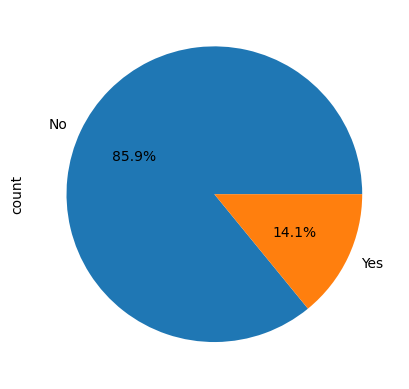

In [138]:
# Self Employed
data['Self_Employed'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [139]:
# Self Employed vs loan Status
data.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: count, dtype: int64

In [140]:
self_employed_approved = (approved_loans['Self_Employed']=='Yes').sum()
not_self_employed_approved = (approved_loans['Self_Employed']=='No').sum()
self_employed = (data['Self_Employed']=='Yes').sum()
not_self_employed = (data['Self_Employed']=='No').sum()

print(f'Percentage of self employed approved loans: {self_employed_approved/total_approved*100:.2f}%')
print(f'Percentage of not self employed approved loans: {not_self_employed_approved/total_approved*100:.2f}%')
print(f'Self employed approval chances: {self_employed_approved/self_employed*100:.2f}%')
print(f'Not Self employed approval chances: {not_self_employed_approved/not_self_employed*100:.2f}%')

Percentage of self employed approved loans: 13.27%
Percentage of not self employed approved loans: 81.28%
Self employed approval chances: 68.29%
Not Self employed approval chances: 68.60%


In [141]:
# ApplicantIncome
data['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

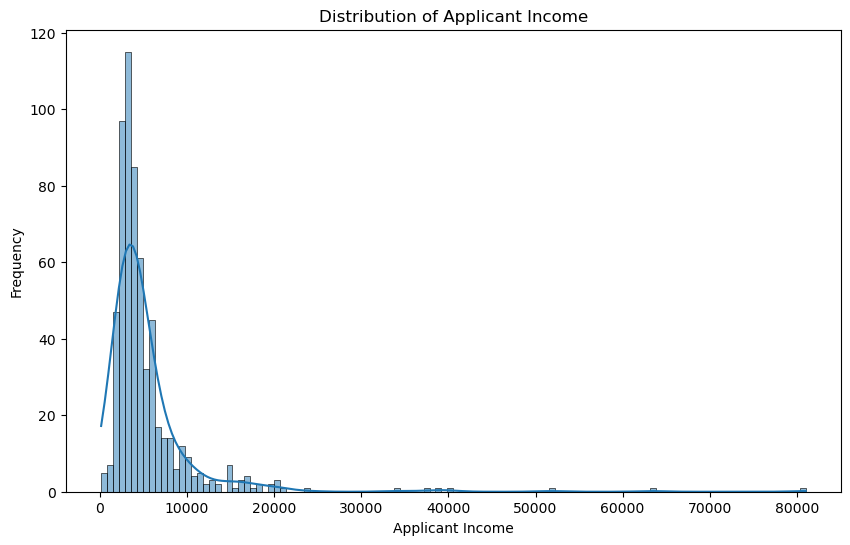

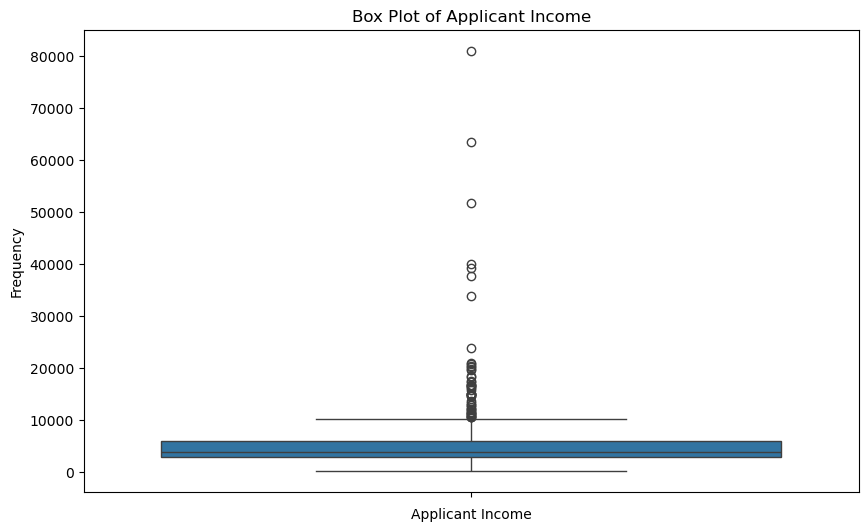

In [142]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['ApplicantIncome'], kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data['ApplicantIncome'])
plt.title('Box Plot of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

### Handling Outliers

In [144]:
q1 = data['ApplicantIncome'].quantile(0.25)
q3 = data['ApplicantIncome'].quantile(0.75)
IQR = q1 - q3

# Define bounds
lower_percentile = q1 - 1.5 * IQR
upper_percentile = q3 + 1.5 * IQR

# Outliers
outliers = data[(data['ApplicantIncome'] < lower_percentile) | (data['ApplicantIncome'] > upper_percentile)]
print(outliers)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [145]:
# Drop loan_id column as it is not needed
data.drop('Loan_ID', axis=1, inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [146]:
# Coapplicant Income
data['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

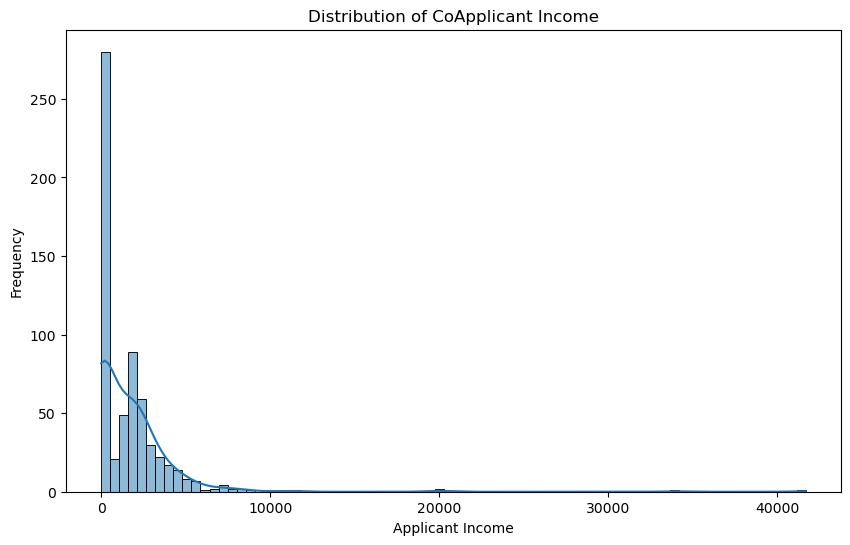

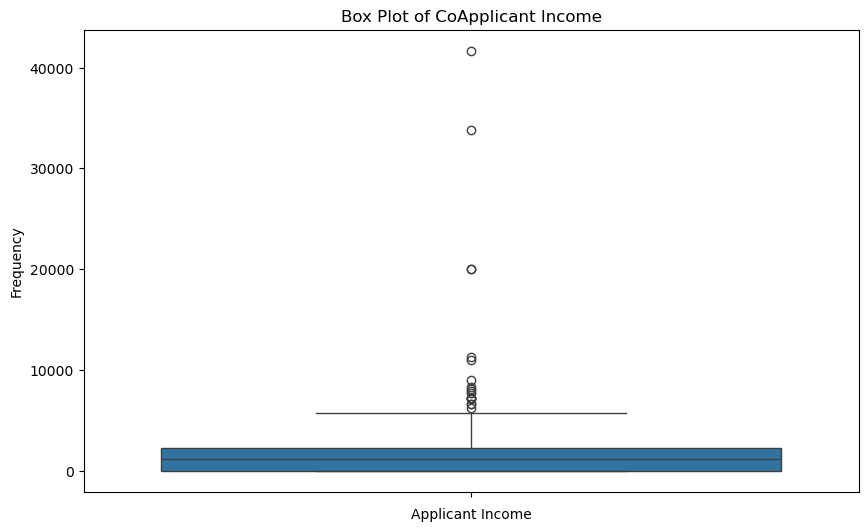

In [147]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['CoapplicantIncome'], kde=True)
plt.title('Distribution of CoApplicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data['CoapplicantIncome'])
plt.title('Box Plot of CoApplicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

### Filling missing values

In [149]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

C:\Users\lavan\AppData\Local\Temp\ipykernel_6832\4230643855.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)


In [150]:
data['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

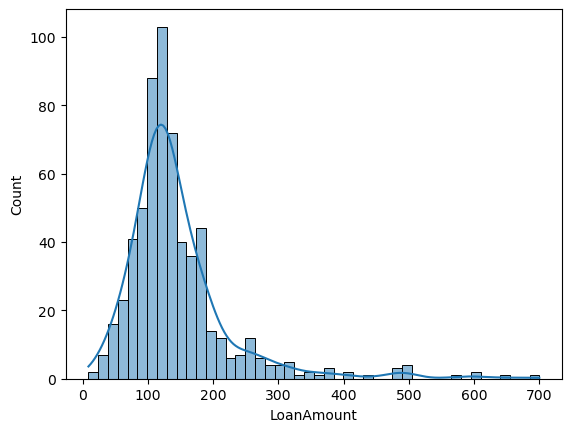

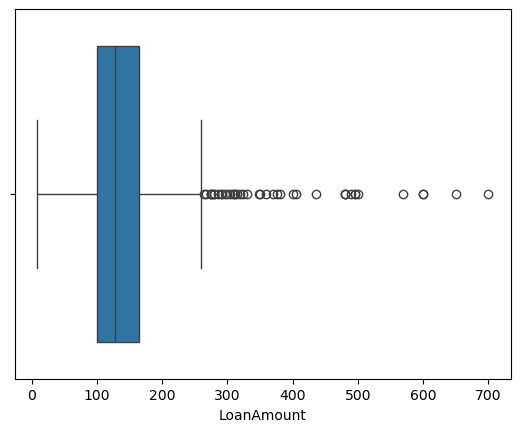

In [151]:
sns.histplot(x=data['LoanAmount'], kde=True)
plt.show()

sns.boxplot(x=data['LoanAmount'])
plt.show()

In [152]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

C:\Users\lavan\AppData\Local\Temp\ipykernel_6832\3294029491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)


In [153]:
data['Loan_Amount_Term'].describe()

count    614.000000
mean     342.410423
std       64.428629
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

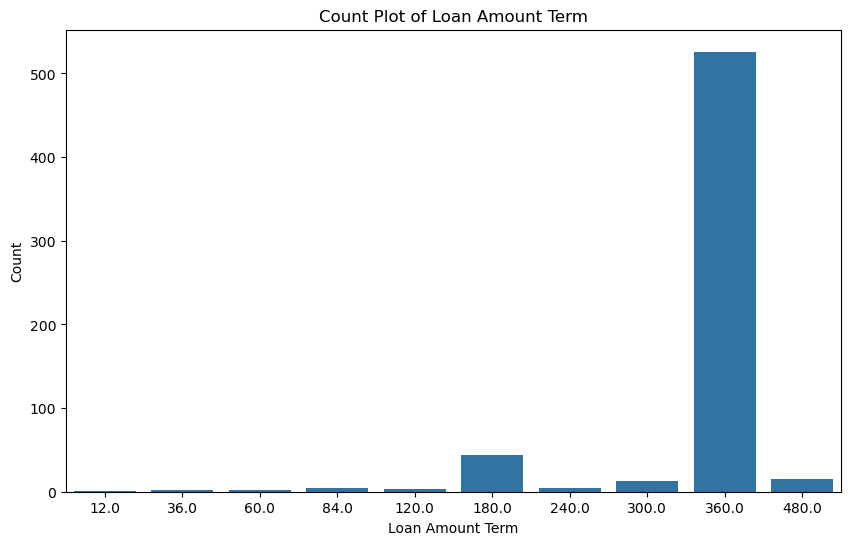

In [154]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Amount_Term', data=data)
plt.title('Count Plot of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.show()

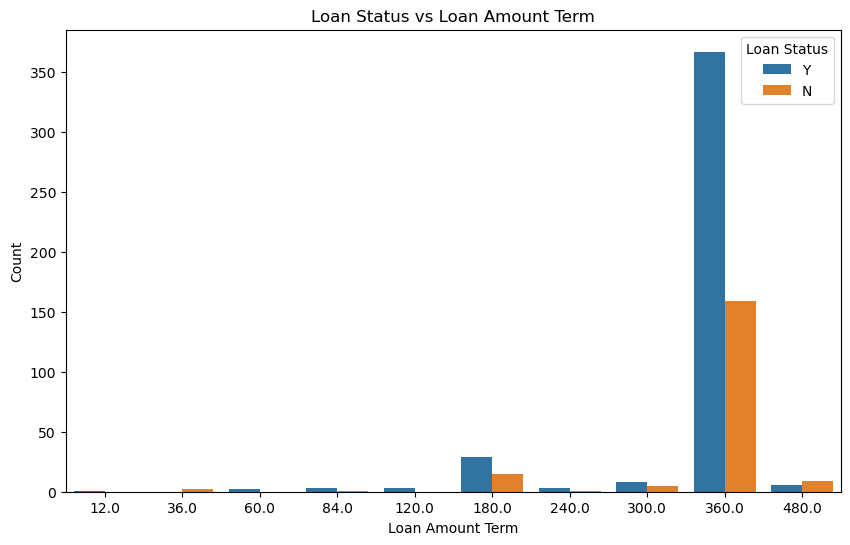

In [155]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=data)
plt.title('Loan Status vs Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [156]:
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [157]:
data['Credit_History'].fillna(1.0, inplace=True)

C:\Users\lavan\AppData\Local\Temp\ipykernel_6832\546754725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Credit_History'].fillna(1.0, inplace=True)


In [158]:
# Credit History vs Loan Status
data.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              415
                N              110
Name: count, dtype: int64

In [159]:
# Filter approved loans
approved_loans = data[data['Loan_Status'] == 'Y']

# Calculate the counts for Credit_History
credit_history_1 = (data['Credit_History'] == 1.0).sum()
credit_history_0 = (data['Credit_History'] == 0.0).sum()

# Calculate the counts for approved loans with respective Credit_History
credit_1_approved = (approved_loans['Credit_History'] == 1.0).sum()
credit_0_approved = (approved_loans['Credit_History'] == 0.0).sum()

# Print the chances of loan approval
print(f'Loan approval chances with credit history: {credit_1_approved / credit_history_1 * 100:.2f}%')
print(f'Loan approval chances without credit history: {credit_0_approved / credit_history_0 * 100:.2f}%')

Loan approval chances with credit history: 79.05%
Loan approval chances without credit history: 7.87%


In [160]:
# Property Area
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [202]:
data.groupby('Property_Area')['Loan_Status'].value_counts()

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: count, dtype: int64

In [204]:
rural = (data['Property_Area']=='Rural').sum()
semiurban = (data['Property_Area']=='Semiurban').sum()
urban = (data['Property_Area']=='Urban').sum()

rural_approved = (approved_loans['Property_Area']=='Rural').sum()
semiurban_approved = (approved_loans['Property_Area']=='Semiurban').sum()
urban_approved = (approved_loans['Property_Area']=='Urban').sum()

print(f'Percentage of rural approved: {rural_approved/rural*100:.2f}%')
print(f'Percentage of semiurban approved: {semiurban_approved/semiurban*100:.2f}%')
print(f'Percentage of rural approved: {urban_approved/urban*100:.2f}%')

Percentage of rural approved: 61.45%
Percentage of semiurban approved: 76.82%
Percentage of rural approved: 65.84%


### Correlation Matrix

In [209]:
# Selecting numeric columns for correlation calculation
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Label encoding for non-numeric columns
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column].astype(str))

# Display encoded DataFrame
print("\nEncoded DataFrame:")
print(data.head())


Encoded DataFrame:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  


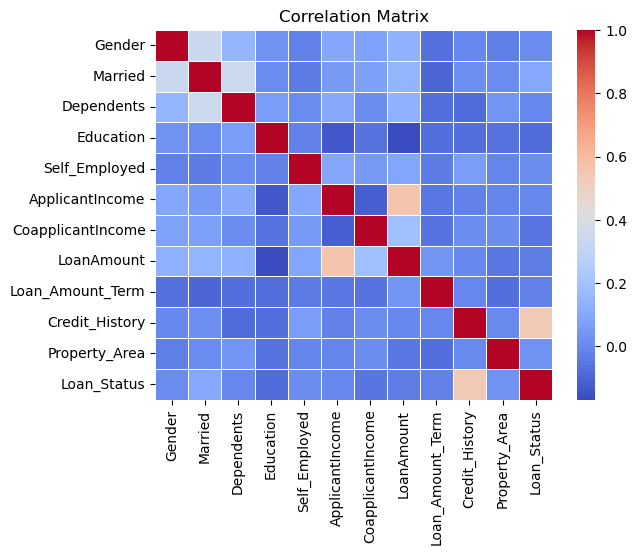

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [211]:
corr_mat = data.corr()
sns.heatmap(corr_mat, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
plt.figure(figsize=(10,8))

### Data Modeling

In [214]:
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [216]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [218]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [224]:
# Splitting dataset into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [228]:
# We will use Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_ypred = rf.predict(x_test)

In [230]:
print(f'Accuracy: {accuracy_score(y_test, rf_ypred)}')
print("Classification Report:")
print(classification_report(y_test, rf_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_ypred))

Accuracy: 0.7723577235772358
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

Confusion Matrix:
[[18 25]
 [ 3 77]]


In [248]:
!pip install xgboost

In [252]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_ypred = xgb_model.predict(x_test)

In [254]:
# XG Boost
print(f'Accuracy: {accuracy_score(y_test, xgb_ypred)}')
print("Classification Report:")
print(classification_report(y_test, xgb_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_ypred))

Accuracy: 0.7398373983739838
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.76      0.89      0.82        80

    accuracy                           0.74       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.73      0.74      0.73       123

Confusion Matrix:
[[20 23]
 [ 9 71]]


In [262]:
scaler = StandardScaler()
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(
    data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,1


In [264]:
# Now apply all the modeling after scaling:
# 1. Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)

rfc_ypred = rfc_model.predict(x_test)
print("\nRandom Forest Classifier:")
print(f'Accuracy: {accuracy_score(y_test, rfc_ypred)}')
print("Classification Report:")
print(classification_report(y_test, rfc_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rfc_ypred))

# 2. XGBoost

xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

xgb_ypred = xgb_model.predict(x_test)
print("xgboost:")
print(f'Accuracy: {accuracy_score(y_test, xgb_ypred)}')
print("Classification Report:")
print(classification_report(y_test, xgb_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_ypred))


Random Forest Classifier:
Accuracy: 0.7723577235772358
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

Confusion Matrix:
[[18 25]
 [ 3 77]]
xgboost:
Accuracy: 0.7398373983739838
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.76      0.89      0.82        80

    accuracy                           0.74       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.73      0.74      0.73       123

Confusion Matrix:
[[20 23]
 [ 9 71]]


### Hyperparameter Tuning

In [269]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train, y_train)

print(f"Best Parameters: {grid_search_rf.best_params_}")
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)

print("\nTuned Random Forest Classifier:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_best_rf)}')
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}

Tuned Random Forest Classifier:
Accuracy: 0.7804878048780488
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Confusion Matrix:
[[18 25]
 [ 2 78]]


#### Feature Importance

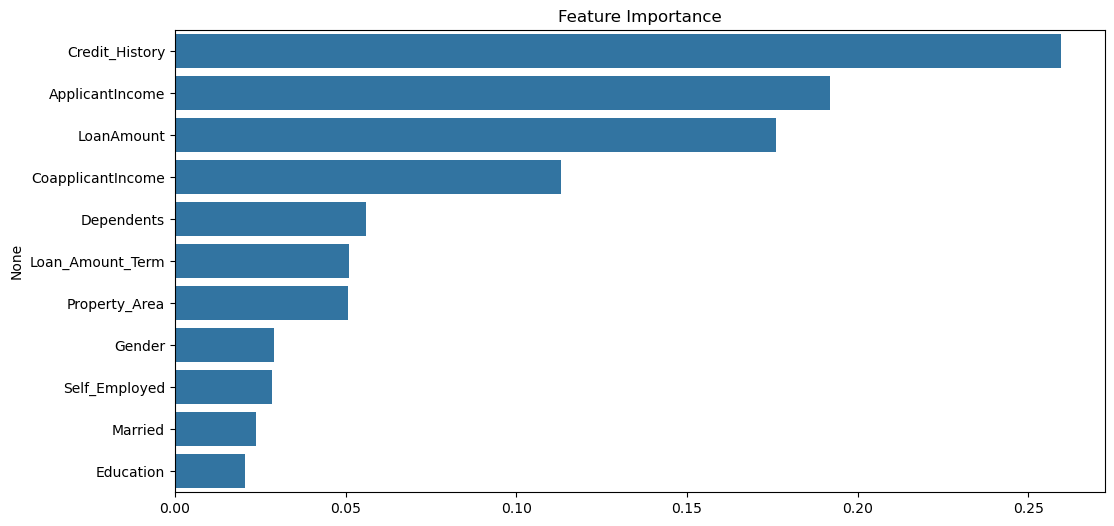

In [271]:
importances = rfc_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=x.columns[indices])
plt.title("Feature Importance")
plt.show()

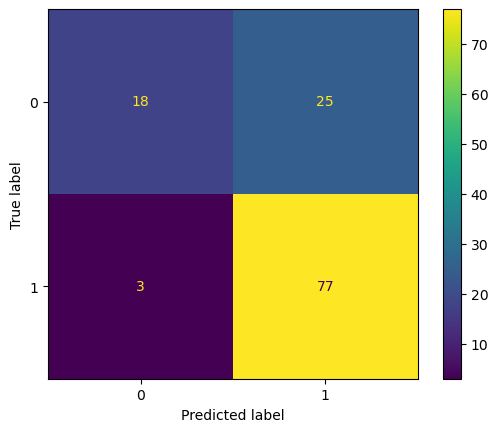

In [276]:
ConfusionMatrixDisplay.from_estimator(rfc_model,x_test,y_test)

In [278]:
# Testing data
test_data = pd.read_csv("C:\\Users\\lavan\\OneDrive\\Desktop\\archive (3)\\Test Dataset.csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [280]:
# Preprocess the test data similar to the training data
test_data['Dependents'].replace('3+', 3, inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(), inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].median(), inplace=True)

# Encode categorical variables
test_data = pd.get_dummies(test_data)

# Ensure the same order of columns as the training data
missing_cols = set(x.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[x.columns]

C:\Users\lavan\AppData\Local\Temp\ipykernel_6832\3000892585.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Dependents'].replace('3+', 3, inplace=True)
C:\Users\lavan\AppData\Local\Temp\ipykernel_6832\3000892585.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [286]:
# Scale the test data
test_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.transform(
    test_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
)

In [290]:
# Make predictions
test_predictions = best_rf.predict(test_data)

test = pd.read_csv("C:\\Users\\lavan\\OneDrive\\Desktop\\archive (3)\\Sample_Submission.csv")

# Prepare the submission file
submission = pd.DataFrame({
    'Loan_ID': test['Loan_ID'],
    'Loan_Status': test_predictions
})

# Convert numerical predictions to categorical ('Y' or 'N')
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Display the submission file
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [292]:
print(test.shape)
print(submission.shape)

(367, 2)
(367, 2)


### Cross-Validation

In [297]:
cv_scores = cross_val_score(best_rf, x, y, cv=5, scoring="accuracy")
print("5‑fold CV accuracy:", cv_scores.mean(), "±", cv_scores.std())

5‑fold CV accuracy: 0.8045848327335733 ± 0.026545606388718206


##### Saving Model

In [299]:
import joblib

joblib.dump(best_rf, "loan_rf_model.pkl")
joblib.dump(scaler, "loan_scaler.pkl")
print("Saved model and scaler.")

Saved model and scaler.


In [302]:
rf = joblib.load("loan_rf_model.pkl")
scaler = joblib.load("loan_scaler.pkl")

#### Build a Python Function

In [305]:
def preprocess_input(data_raw):
    data = data_raw.copy()
    return data

def predict_loans(data_raw):
    data_proc = preprocess_input(data_raw)
    preds = best_rf.predict(data_proc)
    return ["Y" if p == 1 else "N" for p in preds]

In [309]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [311]:
from flask import Flask, request, jsonify

app = Flask(__name__)
model = joblib.load("loan_rf_model.pkl")
scaler = joblib.load("loan_scaler.pkl")

@app.route("/predict", methods=["POST"])
def predict():
    data = pd.DataFrame(request.json)
    # preprocess
    preds = predict_loans(data)
    return jsonify({"predictions": preds})

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\lavan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
